## side load ground truth comparisions

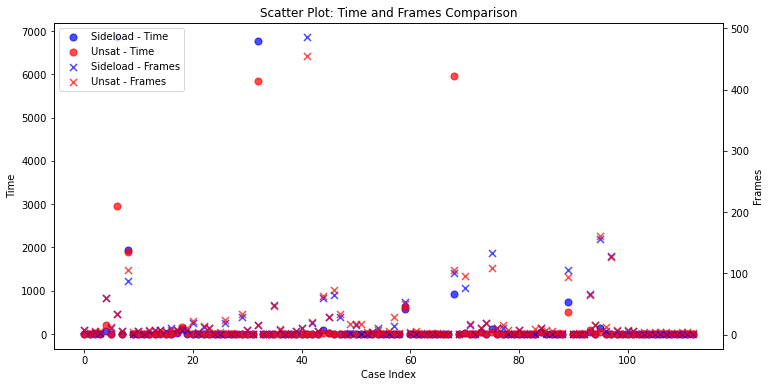

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Custom separator to handle irregular whitespace
sep = r'\s*\|\s*'

# Load data from the two files into DataFrames
sideload_df = pd.read_csv("hwmcc07-sideload.txt", sep=sep, header=None, names=["case_name", "time", "result"], engine='python')
unsat_df = pd.read_csv("hwmcc07-unsat.txt", sep=sep, header=None, names=["case_name", "time", "result"], engine='python')

# Remove any leading/trailing whitespaces from the columns
sideload_df = sideload_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
unsat_df = unsat_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Split the "result" column into separate columns
sideload_df[["result", "clauses", "frames"]] = sideload_df["result"].str.split(" ", expand=True)
unsat_df[["result", "clauses", "frames"]] = unsat_df["result"].str.split(" ", expand=True)

# Convert the "clauses" and "frames" columns to numeric data types
sideload_df[["clauses", "frames"]] = sideload_df[["clauses", "frames"]].apply(pd.to_numeric)
unsat_df[["clauses", "frames"]] = unsat_df[["clauses", "frames"]].apply(pd.to_numeric)

# Create a scatter plot with two y-axes for time and frames
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the case indices
case_indices = range(len(sideload_df))

# Plot the scatter points for time (both DataFrames)
ax1.scatter(case_indices, sideload_df['time'], color='blue', marker='o', alpha=0.7, s=50, label='Sideload - Time')
ax1.scatter(case_indices, unsat_df['time'], color='red', marker='o', alpha=0.7, s=50, label='Unsat - Time')

# Set labels and title for the first y-axis (time)
ax1.set_xlabel('Case Index')
ax1.set_ylabel('Time')
ax1.set_title('Scatter Plot: Time and Frames Comparison')

# Create a second y-axis for frames
ax2 = ax1.twinx()

# Plot the scatter points for frames (both DataFrames)
ax2.scatter(case_indices, sideload_df['frames'], color='blue', marker='x', alpha=0.7, s=50, label='Sideload - Frames')
ax2.scatter(case_indices, unsat_df['frames'], color='red', marker='x', alpha=0.7, s=50, label='Unsat - Frames')

# Set labels for the second y-axis (frames)
ax2.set_ylabel('Frames')

# Combine legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Display the plot
plt.show()

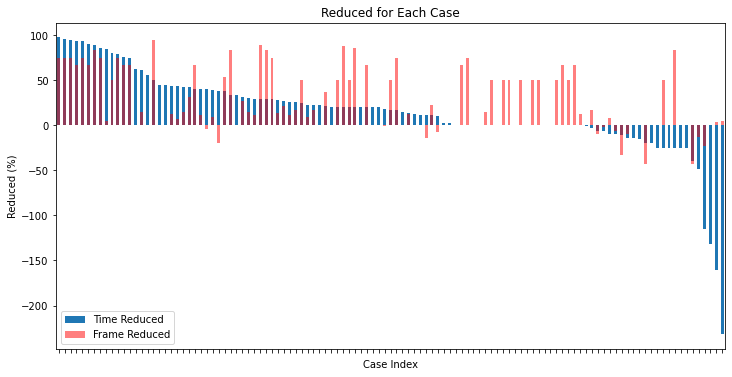

In [7]:
# Merge the two DataFrames on the "case_name" column
merged_df = sideload_df.merge(unsat_df, on="case_name", suffixes=("_sideload", "_unsat"))

# Calculate the percentage of improvement in time
merged_df['time_reduced'] = (merged_df['time_unsat'] - merged_df['time_sideload']) / merged_df['time_unsat'] * 100
merged_df['frame_reduced'] = (merged_df['frames_unsat'] - merged_df['frames_sideload']) / merged_df['frames_unsat'] * 100
# replace all value in 'case_name' to x.split('/')[-1]
merged_df['case_name'] = merged_df['case_name'].apply(lambda x: x.split('/')[-1])
# Set the index of the DataFrame to be the case_name
#merged_df.set_index('case_name', inplace=True)

# Sort the DataFrame by time improvement
sorted_df = merged_df.sort_values(by='time_reduced', ascending=False)


# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sorted_df['time_reduced'].plot(kind='bar', ax=ax, label='Time Reduced')
sorted_df['frame_reduced'].plot(kind='bar', ax=ax, color='red', alpha=0.5, label='Frame Reduced')

# Set labels and title
ax.set_xlabel('Case Index')
ax.set_ylabel('Reduced (%)')
ax.set_title('Reduced for Each Case')

ax.set_xticklabels([])

# Add a legend
ax.legend()

# Display the plot
plt.show()


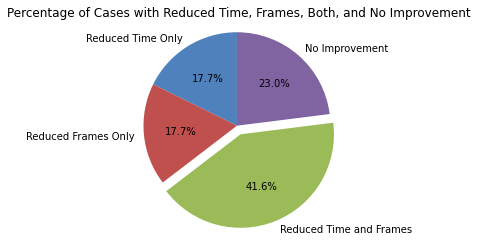

In [8]:
# Calculate the percentage of cases with reduced time and frames
merged_df["time_reduced_case"] = merged_df["time_sideload"] < merged_df["time_unsat"]
merged_df["frame_reduced_case"] = merged_df["frames_sideload"] < merged_df["frames_unsat"]
merged_df["both_reduced_case"] = merged_df["time_reduced_case"] & merged_df["frame_reduced_case"]

time_reduced_only_percentage = (merged_df["time_reduced_case"] & ~merged_df["frame_reduced_case"]).sum() / len(merged_df) * 100
frames_reduced_only_percentage = (merged_df["frame_reduced_case"] & ~merged_df["time_reduced_case"]).sum() / len(merged_df) * 100
both_reduced_percentage = merged_df["both_reduced_case"].sum() / len(merged_df) * 100
no_improvement_percentage = 100 - (time_reduced_only_percentage + frames_reduced_only_percentage + both_reduced_percentage)

# Pie chart data
sizes = [time_reduced_only_percentage, frames_reduced_only_percentage, both_reduced_percentage, no_improvement_percentage]
labels = ['Reduced Time Only', 'Reduced Frames Only', 'Reduced Time and Frames', 'No Improvement']
colors = ['#4F81BD', '#C0504D', '#9BBB59', '#8064A2']
explode = (0, 0, 0.1, 0)

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')

# Set the title
ax.set_title('Percentage of Cases with Reduced Time, Frames, Both, and No Improvement')

# Display the pie chart
plt.show()


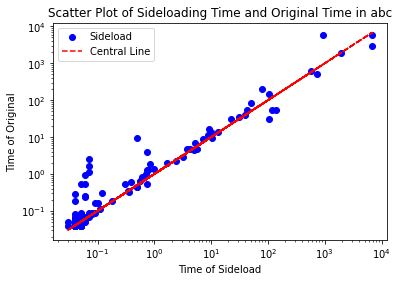

In [9]:
# Extract the columns needed for the scatter plot
#sideload_clauses = sideload_df["clauses"]
sideload_time = sideload_df["time"]
#unsat_clauses = unsat_df["clauses"]
unsat_time = unsat_df["time"]


# Create a scatter plot
plt.scatter(sideload_time, unsat_time, color="blue", label="Sideload")
#plt.scatter(unsat_clauses, unsat_time, color="red", label="Unsat")

# Set labels and title
plt.xlabel("Time of Sideload")
plt.ylabel("Time of Original")
plt.title("Scatter Plot of Sideloading Time and Original Time in abc")
# Add a central line
plt.plot(sideload_time, sideload_time, color="red", linestyle="--", label="Central Line")
plt.legend()
# Set logarithmic scale for both axes
plt.xscale("log")
plt.yscale("log")

# Display the plot
plt.show()

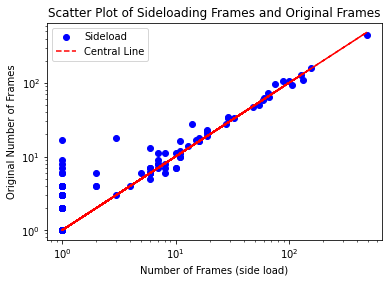

In [10]:
# Extract the columns needed for the scatter plot
#sideload_time = sideload_df["time"]
sideload_frames = sideload_df["frames"]
#unsat_time = unsat_df["time"]
unsat_frames = unsat_df["frames"]

# Create a scatter plot
plt.scatter(sideload_frames, unsat_frames, color="blue", label="Sideload")
#plt.scatter(unsat_frames, unsat_time, color="red", label="Unsat")

# Set labels and title
plt.xlabel("Number of Frames (side load)")
plt.ylabel("Original Number of Frames")
plt.title("Scatter Plot of Sideloading Frames and Original Frames")
# Add a central line
plt.plot(sideload_frames, sideload_frames, color="red", linestyle="--", label="Central Line")
plt.legend()
# Set logarithmic scale for both axes
plt.xscale("log")
plt.yscale("log")

# Display the plot
plt.show()

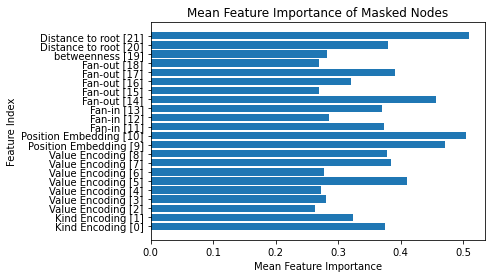

In [5]:
import numpy as np
import matplotlib.pyplot as plt

mean_feature_importance = np.array([0.374947, 0.32296842, 0.2627906, 0.28132135, 0.27235824, 0.41079497,
 0.27747044, 0.38448298, 0.37764075, 0.47072393, 0.5038246, 0.37386093,
 0.2848059, 0.36956352, 0.45604974, 0.26912755, 0.32067987, 0.39013413,
 0.2701648, 0.28285956, 0.3794835, 0.5099708])

# Generate the y values (indices) for the horizontal bar chart
y = np.arange(len(mean_feature_importance))

# Plot the horizontal bar chart
plt.barh(y, mean_feature_importance)

# Set custom y-axis labels
feature_labels = [
    "Kind Encoding [0]",
    "Kind Encoding [1]",
    "Value Encoding [2]",
    "Value Encoding [3]",
    "Value Encoding [4]",
    "Value Encoding [5]",
    "Value Encoding [6]",
    "Value Encoding [7]",
    "Value Encoding [8]",
    "Position Embedding [9]",
    "Position Embedding [10]",
    "Fan-in [11]",
    "Fan-in [12]",
    "Fan-in [13]",
    "Fan-out [14]",
    "Fan-out [15]",
    "Fan-out [16]",
    "Fan-out [17]",
    "Fan-out [18]",
    "betweenness [19]",
    "Distance to root [20]",
    "Distance to root [21]",
]

# Set y-axis tick labels
plt.yticks(y, feature_labels)

# Set x-axis and y-axis labels
plt.xlabel("Mean Feature Importance")
plt.ylabel("Feature Index")

# Set the title
plt.title("Mean Feature Importance of Masked Nodes")

# Show the plot
plt.show()
